# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


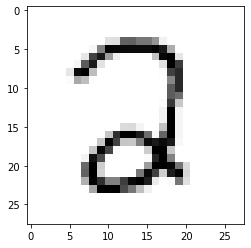

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2495013995323291
train accuracy is: 0.5371390418961776, test accuracy is 0.545866935483871


Epoch 10 Loss 0.23763910896189866
train accuracy is: 0.7981138374228008, test accuracy is 0.8069556451612904


Epoch 20 Loss 0.18018058812181187
train accuracy is: 0.871724253046236, test accuracy is 0.8840725806451613


Epoch 30 Loss 0.09005858334879926
train accuracy is: 0.9090302119846436, test accuracy is 0.9178427419354839


Epoch 40 Loss 0.05970931264185905
train accuracy is: 0.9344016024036054, test accuracy is 0.9450604838709677


Epoch 50 Loss 0.04694979929547441
train accuracy is: 0.9469203805708563, test accuracy is 0.9576612903225806


Epoch 60 Loss 0.040257124830906356
train accuracy is: 0.9547654815556669, test accuracy is 0.9621975806451613


Epoch 70 Loss 0.036190037321908314
train accuracy is: 0.958103822400267, test accuracy is 0.9647177419354839


Epoch 80 Loss 0.033427108328641236
train accuracy is: 0.9614421632448673, test accuracy is 0.9657258064516129


Epoch 90 Loss 0.03137591541167859
train accuracy is: 0.9636120847938574, test accuracy is 0.96875


Epoch 100 Loss 0.02975881025403082
train accuracy is: 0.9646135870472375, test accuracy is 0.969758064516129


Epoch 110 Loss 0.028429108477329133
train accuracy is: 0.9667000500751126, test accuracy is 0.969758064516129


Epoch 120 Loss 0.027312169867235916
train accuracy is: 0.9681188449340677, test accuracy is 0.9692540322580645


Epoch 130 Loss 0.02635525922363569
train accuracy is: 0.9690368886663329, test accuracy is 0.9692540322580645


Epoch 140 Loss 0.025514292928723693
train accuracy is: 0.9697880153563679, test accuracy is 0.96875


Epoch 150 Loss 0.024776327336635446
train accuracy is: 0.971290268736438, test accuracy is 0.9692540322580645


Epoch 160 Loss 0.024110028488336405
train accuracy is: 0.9721248539475881, test accuracy is 0.9702620967741935


Epoch 170 Loss 0.023510591600127247
train accuracy is: 0.9731263562009681, test accuracy is 0.9702620967741935


Epoch 180 Loss 0.022956399252166807
train accuracy is: 0.9739609414121182, test accuracy is 0.9712701612903226


Epoch 190 Loss 0.022435542834635676
train accuracy is: 0.9742113169754631, test accuracy is 0.9717741935483871


Epoch 200 Loss 0.021943272328051173
train accuracy is: 0.9750459021866132, test accuracy is 0.9717741935483871


Epoch 210 Loss 0.021477193072944073
train accuracy is: 0.9757970288766483, test accuracy is 0.9727822580645161


Epoch 220 Loss 0.021055521677045604
train accuracy is: 0.9763812385244534, test accuracy is 0.9737903225806451


Epoch 230 Loss 0.020649325627260857
train accuracy is: 0.9767985311300283, test accuracy is 0.9737903225806451


Epoch 240 Loss 0.02026074530548085
train accuracy is: 0.9768819896511434, test accuracy is 0.9737903225806451


0.05780505775565736

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.25071657893150434
train accuracy is: 0.6652478718077116, test accuracy is 0.6386088709677419


Epoch 10 Loss 0.10147492053555363
train accuracy is: 0.9178768152228343, test accuracy is 0.9284274193548387


Epoch 20 Loss 0.07827795720554662
train accuracy is: 0.929561008178935, test accuracy is 0.9395161290322581


Epoch 30 Loss 0.06764579696314621
train accuracy is: 0.9358203972625605, test accuracy is 0.9475806451612904


Epoch 40 Loss 0.0612122661569746
train accuracy is: 0.9414121181772659, test accuracy is 0.9511088709677419


Epoch 50 Loss 0.05679903199693006
train accuracy is: 0.9439158738107161, test accuracy is 0.9536290322580645


Epoch 60 Loss 0.05354321274167929
train accuracy is: 0.9467534635286263, test accuracy is 0.9571572580645161


Epoch 70 Loss 0.051016033334807455
train accuracy is: 0.9491737606409615, test accuracy is 0.9581653225806451


Epoch 80 Loss 0.04898504323918509
train accuracy is: 0.9511767651477215, test accuracy is 0.9601814516129032


Epoch 90 Loss 0.04730651169957166
train accuracy is: 0.9522617259222167, test accuracy is 0.9606854838709677


Epoch 100 Loss 0.045891181698677515
train accuracy is: 0.9531797696544817, test accuracy is 0.9627016129032258


Epoch 110 Loss 0.04467620938469843
train accuracy is: 0.9543481889500918, test accuracy is 0.9637096774193549


Epoch 120 Loss 0.04361779327125623
train accuracy is: 0.9555166082457018, test accuracy is 0.9647177419354839


Epoch 130 Loss 0.04268652747481024
train accuracy is: 0.9559339008512769, test accuracy is 0.9657258064516129


Epoch 140 Loss 0.04185695808749965
train accuracy is: 0.956518110499082, test accuracy is 0.9662298387096774


Epoch 150 Loss 0.04111418224436157
train accuracy is: 0.957102320146887, test accuracy is 0.9667338709677419


Epoch 160 Loss 0.04044094399975011
train accuracy is: 0.957603071273577, test accuracy is 0.9672379032258065


Epoch 170 Loss 0.039828940782097644
train accuracy is: 0.9581872809213821, test accuracy is 0.967741935483871


Epoch 180 Loss 0.039268857038508485
train accuracy is: 0.9583541979636121, test accuracy is 0.967741935483871


Epoch 190 Loss 0.038753391151709095
train accuracy is: 0.9591053246536472, test accuracy is 0.9682459677419355


Epoch 200 Loss 0.0382774407852857
train accuracy is: 0.9595226172592222, test accuracy is 0.9682459677419355


Epoch 210 Loss 0.037835903923340804
train accuracy is: 0.9598564513436821, test accuracy is 0.96875


Epoch 220 Loss 0.0374239134157381
train accuracy is: 0.9600233683859122, test accuracy is 0.96875


Epoch 230 Loss 0.037039392990427834
train accuracy is: 0.9602737439492572, test accuracy is 0.9682459677419355


Epoch 240 Loss 0.03667880261328245
train accuracy is: 0.9607744950759473, test accuracy is 0.9682459677419355


0.063980195659034

### Comparing results of NN and LR

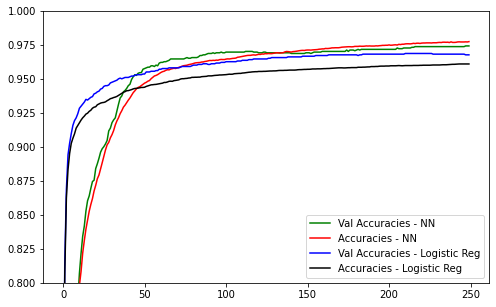

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

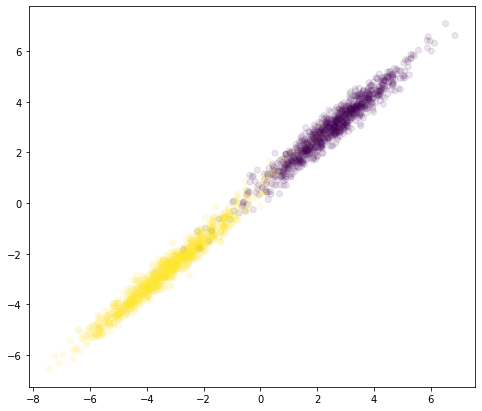

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

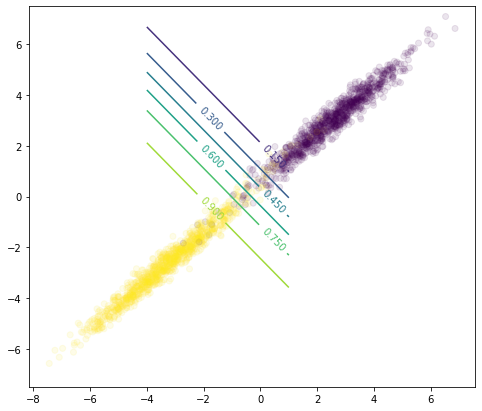

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );